In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import curve_fit
import pandas as pd
from scipy.integrate import trapz
from scipy.stats import linregress

# absorption

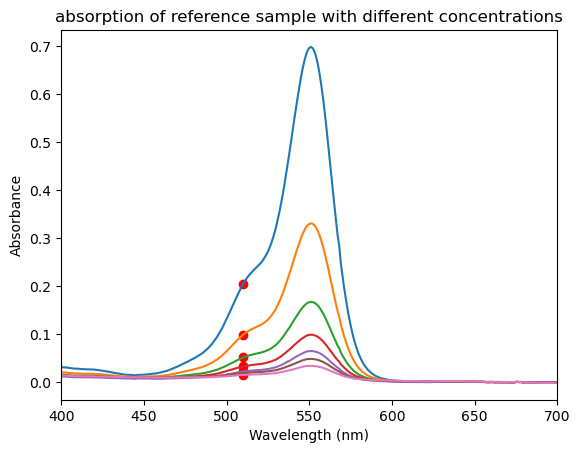

[0.20474944576, 0.09926285934, 0.05158336602, 0.03268170242, 0.022275731979999998, 0.01898578008, 0.015140798980000002]


In [2]:
data_abs_ref = pd.read_csv('ref sample 1-6only.csv')

wavelength_abs_ref = np.array([data_abs_ref.iloc[:, 0], data_abs_ref.iloc[:, 2], data_abs_ref.iloc[:, 4], data_abs_ref.iloc[:, 6], data_abs_ref.iloc[:, 8], data_abs_ref.iloc[:, 10], data_abs_ref.iloc[:, 12]])
absorbance_abs_ref = np.array([data_abs_ref.iloc[:, 1], data_abs_ref.iloc[:, 3], data_abs_ref.iloc[:, 5], data_abs_ref.iloc[:, 7], data_abs_ref.iloc[:, 9], data_abs_ref.iloc[:, 11], data_abs_ref.iloc[:, 13]])

baseline_values = []

for i in range(len(wavelength_abs_ref)):
    baseline_range = (wavelength_abs_ref[i] >= 650) & (wavelength_abs_ref[i] <= 700)
    baseline = np.mean(absorbance_abs_ref[i][baseline_range])
    absorbance_abs_ref[i] -= baseline
    baseline_values.append(baseline)

absorbance_at_510 = []

for i in range(len(wavelength_abs_ref)):
    for j in range(len(wavelength_abs_ref[i])):
        if wavelength_abs_ref[i][j] == 510:
            absorbance_at_510.append(absorbance_abs_ref[i][j])

for i in range(len(wavelength_abs_ref)):
    plt.plot(wavelength_abs_ref[i], absorbance_abs_ref[i])

plt.xlim(400,700)   
plt.scatter([510]*len(absorbance_at_510), absorbance_at_510, color='red', label='Absorbance at 510 nm')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title('absorption of reference sample with different concentrations')
plt.show()
print(absorbance_at_510)


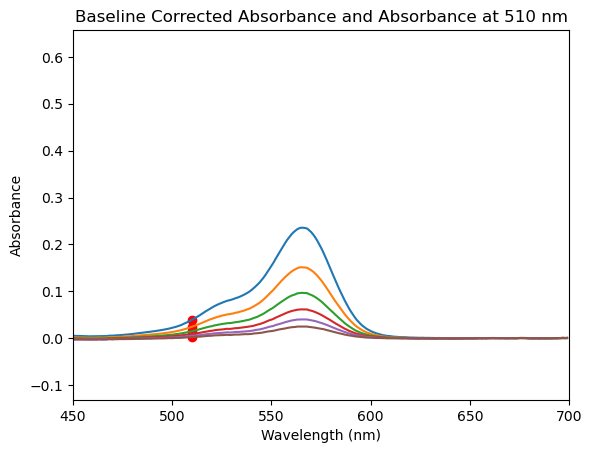

[0.03934969142, 0.02443862184, 0.0149442378, 0.00886349526, 0.0049065768199999995, 0.0024851960399999993]


In [3]:
data_abs_sample= pd.read_csv('sample conc 1-6exp.csv', converters={'wavelength': pd.to_numeric})

absorbance_abs_sample= np.array([data_abs_sample.iloc[:, 2], data_abs_sample.iloc[:, 4], data_abs_sample.iloc[:, 6], data_abs_sample.iloc[:, 8], data_abs_sample.iloc[:, 10], data_abs_sample.iloc[:, 12]])
wavelength_abs_sample= np.array([data_abs_sample.iloc[:, 1], data_abs_sample.iloc[:, 3], data_abs_sample.iloc[:, 5], data_abs_sample.iloc[:, 7], data_abs_sample.iloc[:, 9], data_abs_sample.iloc[:, 11]])

baseline_values_s = []

for i in range(len(wavelength_abs_sample)):
    baseline_range = (wavelength_abs_sample[i] >= 650) & (wavelength_abs_sample[i] <= 700)
    baseline = np.mean(absorbance_abs_sample[i][baseline_range])
    absorbance_abs_sample[i] -= baseline
    baseline_values_s.append(baseline)
    
absorbance_at_510_s = []

for i in range(len(wavelength_abs_sample)):
    for j in range(len(wavelength_abs_sample[i])):
        if wavelength_abs_sample[i][j] == 510:
            absorbance_at_510_s.append(absorbance_abs_sample[i][j])

for i in range(len(wavelength_abs_sample)):
    plt.plot(wavelength_abs_sample[i], absorbance_abs_sample[i])

plt.xlim(450,700)    

plt.scatter([510]*len(absorbance_at_510_s), absorbance_at_510_s, color='red')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title('Baseline Corrected Absorbance and Absorbance at 510 nm')
plt.show()

print(absorbance_at_510_s)


# emission


In [4]:
baseline_data=pd.read_csv('solvents.csv', delimiter='\t')
wavelength_solvents= baseline_data['Wavelength[nm]']

water= baseline_data['Spectrum4[]']
methanol= baseline_data['Spectrum2[]']


Text(0.5, 1.0, 'reference')

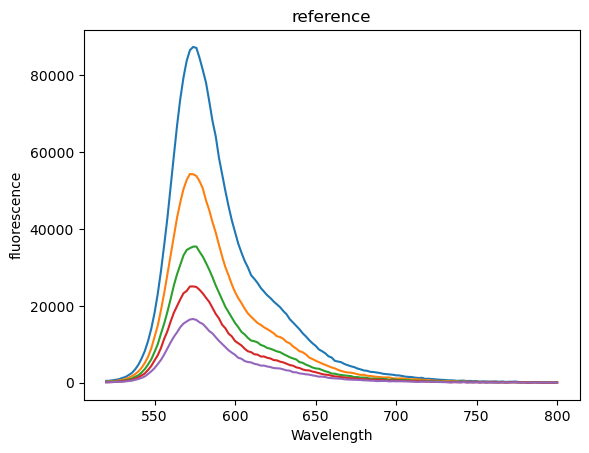

In [5]:
data_ref_em= pd.read_csv('ref sample 2-6.csv', delimiter='\t')

wavelength_em_r= data_ref_em['Wavelength[nm]']
spectrum_columns = ['Spectrum1[]', 'Spectrum2[]', 'Spectrum3[]', 'Spectrum4[]', 'Spectrum5[]']


for spectrum_column in spectrum_columns:
    data_ref_em[spectrum_column] -= methanol
    area= np.trapz(data_ref_em[spectrum_column])
#     print(area)
    plt.plot(wavelength_em_r, data_ref_em[spectrum_column], label=spectrum_column)
plt.xlabel('Wavelength')
plt.ylabel('fluorescence')
plt.title('reference')

Text(0.5, 1.0, 'sample')

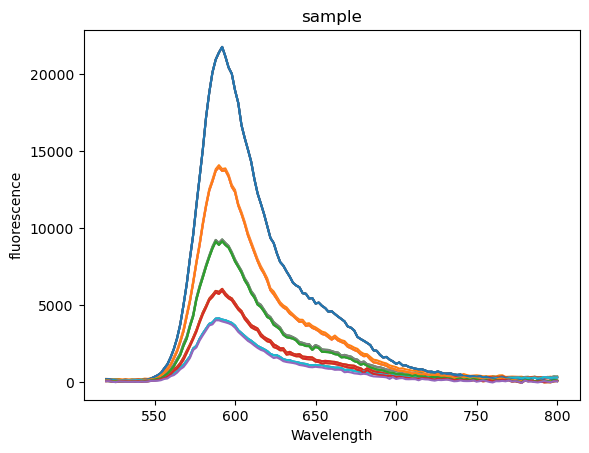

In [6]:
data_sample_em= pd.read_csv('sample em 2-6.csv',delimiter='\t')

wavelength_em_s= data_sample_em['Wavelength[nm]']
spectrum_columns_s= ['Spectrum1[]', 'Spectrum2[]', 'Spectrum3[]', 'Spectrum4[]', 'Spectrum5[]']

for spectrum_column in spectrum_columns:
    
    data_sample_em[spectrum_column] -= water
    area= np.trapz(data_sample_em[spectrum_column])
    
#     print(area)
    
    plt.plot(wavelength_em_s, data_sample_em[spectrum_columns_s], label=spectrum_column)
plt.xlabel('Wavelength')
plt.ylabel('fluorescence')
plt.title('sample')

# integrated fluorescence intensity and absorbance values


slope: 45787495.73859389
Correlation coefficient (r value): 0.9999999999999997


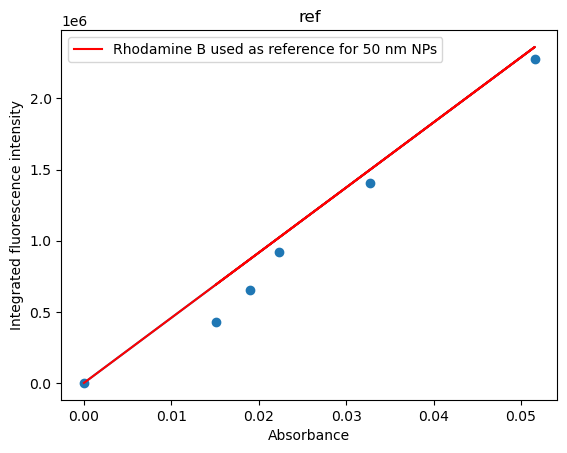

slope: 45787495.73859389


In [7]:
ref_INF= [0,2274637.960845,1406240.98184, 921575.436935,651659.203195,428056.49441499996]
ref_abs=[0,0.05158336602,0.03268170242,0.022275731979999998,0.01898578008,0.01514079898000000]


plt.scatter(ref_abs, ref_INF)
plt.title('ref')
slope_r, _ = np.polyfit(ref_abs, ref_INF, 1)
plt.plot(ref_abs, slope_r* np.array(ref_abs))

y_predictedr = slope_r * np.array(ref_abs)

# Compute the correlation coefficient (Pearson r)
correlation_matrix_r = np.corrcoef(ref_abs, y_predictedr)
correlation_coefficient_r = correlation_matrix_r[0, 1]

# Plot the linear fit
plt.plot(ref_abs, y_predictedr, color='red', label='Rhodamine B used as reference for 50 nm NPs')
plt.legend()
plt.xlabel('Absorbance')
plt.ylabel('Integrated fluorescence intensity')
print("slope:", slope_r)
print("Correlation coefficient (r value):", correlation_coefficient_r)
plt.show()
print("slope:", slope_r)

slope: 24505957.464928035
Correlation coefficient (r value): 0.9957862974150045


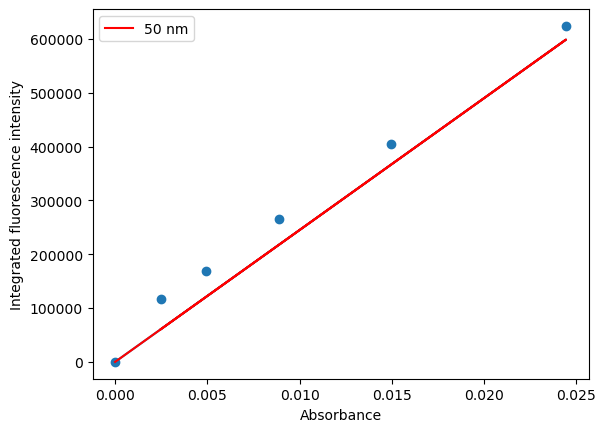

In [8]:
sample_INF= [0,624286.485349,405237.78264900006, 265988.189679,168102.44653000002,116505.13495600002]
sample_abs=[0,0.02443862184,0.0149442378,  0.00886349526, 0.0049065768199999995, 0.0024851960399999993]

plt.scatter(sample_abs, sample_INF)
slope_s, _ = np.polyfit(sample_abs, sample_INF, 1)

plt.plot(sample_abs, slope_s* np.array(sample_abs))

y_predicted = slope_s * np.array(sample_abs) 


correlation_matrix = np.corrcoef(sample_INF, y_predicted)
correlation_coefficient = correlation_matrix[0, 1]


plt.plot(sample_abs, y_predicted, color='red', label='50 nm')
plt.legend()
plt.xlabel('Absorbance')
plt.ylabel('Integrated fluorescence intensity')
print("slope:", slope_s)
print("Correlation coefficient (r value):", correlation_coefficient)
plt.show()
